In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv',sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#proc content
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False
1598,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#Check for amount of missing values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Check for amount of non null values
wine.notnull().sum()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

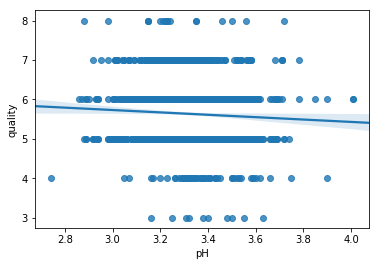

In [8]:
sns.regplot(x=wine['pH'],y=wine['quality'])

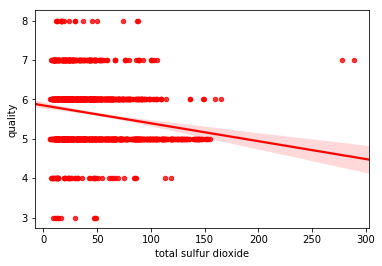

In [9]:
from itertools import cycle
color_gen = cycle(('blue', 'lightgreen', 'red', 'purple', 'gray', 'cyan'))


import numpy as np
colors = np.random.random((len(wine['total sulfur dioxide']),3))

# for i in range(len(wine['total sulfur dioxide'])):
#     sns01 = sns.regplot(x=wine['total sulfur dioxide'],y=wine['quality'],color=colors[i],scatter_kws={'s':15},fit_reg=False)

#color=next(color_gen) if you're using cycle
    
sns.regplot(x=wine['total sulfur dioxide'], y=wine['quality'],color='red',scatter_kws={'s':20},fit_reg=True)


#Plot each individual point separately
# for i,a in enumerate(wine[['total sulfur dioxide','quality']].values):
#      sns.regplot(x=a, y=a, color=colors[i],scatter_kws={'s':20})

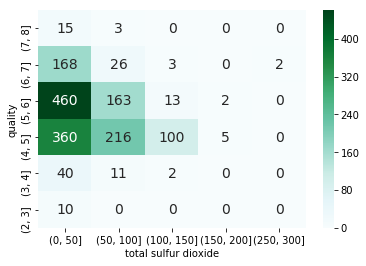

In [14]:
so2bins = (0,50,100,150,200,250,300)
graphdf = pd.DataFrame(pd.cut(wine['total sulfur dioxide'], bins = so2bins))
qualitybins = (2,3,4,5,6,7,8,9)
graphdf['quality'] = pd.DataFrame(pd.cut(wine['quality'], bins=qualitybins))
graphdf['count'] = 1
graphdf= pd.pivot_table(graphdf,values='count', index='quality', columns='total sulfur dioxide', aggfunc=np.sum, fill_value = 0).sort_values('quality',ascending=[False])
#dataframe, values is the column of 1s for summing, index is multilevel index, column is multilevel column
#aggfunc is numpy aggregate to do (e.g. np.sum, np.mean etc)
#fill_value subs the np.NaN to 0, hence DF (data type) dtype can be integer
#Also can use np.count_nonzero on 'pH' or 'quality' if no 'count' column
sns.heatmap(graphdf, annot=True, annot_kws={"size":14}, cmap='BuGn', fmt='g')

In [ ]:
#Preprocessing Data
bins = (2, 6.5, 8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [ ]:
#Check if binning worked
wine['quality'].head(20)

In [ ]:
wine['quality'].unique()
#the category order is important [bad < good] will link to [0 < 1] by LabelEncoder

In [ ]:
#LabelEncoder converts categories to response int 0, 1,...
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
wine['quality'].head(20)

In [ ]:
#proc content
wine['quality'].value_counts()

In [ ]:
#simple bar chart plot on one variable
sns.countplot(wine['quality'])

In [ ]:
len(wine['total sulfur dioxide'])

In [ ]:
#Seperate dataset as response variable and feature variables
X = wine.drop('quality', axis=1)
y = wine['quality']

In [ ]:
#train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.tail(5)

In [ ]:
X_test.tail(5)

In [ ]:
y_train.tail(5)

In [ ]:
y_test.tail(5)

In [ ]:
#Applying standard scaling to get optimized result

sc = StandardScaler()
#You need to do a fit "train your scaler" before you transform your x values to reduce dimensionality through PCA
#Subsequently, test data should not do a 'retraining' or refitting, but transform with the same formula as what training data did
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

In [ ]:
X_train2

# Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train2,y_train)
pred_rfc=rfc.predict(X_test2)

In [ ]:
pred_rfc[:20]

In [ ]:
#Let's see how our model performed

print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

#Visualise confusion matrix
RFC_CM = pd.DataFrame(confusion_matrix(y_test, pred_rfc), ['Actual 0', 'Actual 1'], ['Predict 0', 'Predict 1'])
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(RFC_CM, annot=True,annot_kws={"size": 16}, cmap='Blues', linewidths=1, fmt='g')# font size
plt.title('Confusion Matrix for Random Forest')

#Like matplotlib, seaborn graph overlap if you plot them tgt so you need to seperate

In [ ]:
sns.heatmap(pd.DataFrame(np.array([[0.92,0.93,0.93],[0.58,0.53,0.56],[0.87,0.88,0.87]]),[0,1,'avg/total'],['precision','recall','f1']), annot=True, annot_kws={"size":16}, cmap='Greens', linewidths=1)
plt.title('Classification Report for Random Forest')

# SVM Classifier

In [ ]:
clf=svm.SVC()
clf.fit(X_train2, y_train)
pred_clf = clf.predict(X_test2)

In [ ]:
#Let's see how our model performed

print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

#Visualise confusion matrix
CLF_CM = pd.DataFrame(confusion_matrix(y_test, pred_clf), ['Actual 0', 'Actual 1'], ['Predict 0', 'Predict 1'])
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(CLF_CM, annot=True,annot_kws={"size": 16}, cmap='Blues', linewidths=1, fmt='g')# font size
plt.title('Confusion Matrix for SVM')

In [ ]:
sns.heatmap(pd.DataFrame(np.array([[0.88,0.98,0.93],[0.71,0.26,0.37],[0.86,0.88,0.85]]),[0,1,'avg/total'],['precision','recall','f1']), annot=True, annot_kws={"size":16}, cmap='Greens', linewidths=1)
plt.title('Classification Report for SVM')

# Neural Network

In [ ]:
#3 layers of 11 nodes
#Max iteration of 500
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train2,y_train)
pred_mlpc = mlpc.predict(X_test2)

In [ ]:
#Let's see how our model performed

print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

#Visualise confusion matrix
MLPC_CM = pd.DataFrame(confusion_matrix(y_test, pred_mlpc), ['Actual 0', 'Actual 1'], ['Predict 0', 'Predict 1'])
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(MLPC_CM, annot=True,annot_kws={"size": 16}, cmap='Blues', linewidths=1, fmt='g')# font size
plt.title('Confusion Matrix for Neural Network')

In [ ]:
sns.heatmap(pd.DataFrame(np.array([[0.91,0.94,0.93],[0.58,0.47,0.52],[0.86,0.87,0.87]]),[0,1,'avg/total'],['precision','recall','f1']), annot=True, annot_kws={"size":16}, cmap='Greens', linewidths=1)
plt.title('Classification Report for Neural Network')

In [ ]:
print(type(confusion_matrix(y_test, pred_mlpc)))

# Neural Network 2

In [ ]:
mlpc15 = MLPClassifier(hidden_layer_sizes=(15,15,15,10),max_iter=1500)
mlpc15.fit(X_train2,y_train)
pred_mlpc15 = mlpc15.predict(X_test2)


In [ ]:
MLPC15_CM = pd.DataFrame(confusion_matrix(y_test,pred_mlpc15),['Actual 0', 'Actual 1'], ['Predict 0', 'Predict 1'])
MLPC15_CM




In [ ]:
print(classification_report(y_test, pred_mlpc15))

In [ ]:
#Unable to use directly in sns, its all in one string with \n used

classification_report(y_test, pred_mlpc15)

In [ ]:
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(np.array([[0.92,0.93,0.93],[0.58,0.53,0.56],[0.87,0.88,0.87]]),[0,1,'avg/total'],['precision','recall','f1']), annot=True, annot_kws={"size":16}, cmap='Greens', linewidths=1)

#Key tips
#If you put dataframe instead of np array, the labels from DF are shown
#annot=True for cell label, annot_kws={size: 16}
#linewidths=1 for styling (white gap)
#cmap = greens, blues, reds, etc. for one colour grading

In [ ]:
sns.set(font_scale=1.4)
sns.heatmap(MLPC15_CM, annot=True, annot_kws={"size": 16}, cmap='Blues', linewidths=1, fmt='g') #font size